# <center>***Datathon*** - *Mercado inmobiliario*</center>

***

###  <center>*Proyecto Individual - Creación de modelos de Machine Learning* </center>

 ### <center> ***Nuestro objetivo*** </center>
 ---
 --->--->--->--->--->--->--->--->--->--->--->--->

 #### <center>

- Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de las propiedades en venta, utilizando los datos que se han puesto a su disposición.​Para esto debe crear la columna category_price, en la cual se consideran las categorías:

- 'low': Para precios entre 0 y 999 dólares (debe tomar valor 1 en el archivo con las predicciones).

- 'high': Para precios desde 1000 dólares en adelante (debe tomar valor 0 en el archivo con las predicciones).​Considerando esta categorización, el objetivo es predecir si una propiedad pertenece a la categoría de precios bajos (low).​

- Implementar un modelo de clasificación con aprendizaje no supervisado, utilizando clustering que agrupe las propiedades por segun las 3 categorias a las que pueden pertenecer. Para ello, solo usaran el dataset de test provisto, eliminando previamente las caracteristicas que presenten nulos.​</center>
 ---

## <center> **Consignas a Implementar** </center>

#### <center> Procesamientos de datos </center>

#### <center> Creación de Modelo de Machine Learning </center>

---

### Descripción de las dimensiones

- **id:** Identificador del anuncio.
- **url:** Link web del anuncio.
- **region:** Región de Estados Unidos en donde se encuentra la propiedad.
- **region_url:** Link web de los anuncios pertenecientes a la región.
- **price:** Precio de la propiedad en dólares.
- **type:** Tipo de propiedad.
- **sqfeet:** Metros cuadrados de la propiedad.
- **beds:** Cantidad de dormitorios.
- **baths:** Cantidad de baños.
- **cats_allowed:** Si se permiten gatos en la propiedad toma el valor 1, 0 para caso contrario.
- **dogs_allowed:** Si se permiten perros en la propiedad toma el valor 1, 0 para caso contrario.
- **smoking_allowed:** Si se permite fumar en la propiedad toma el valor 1, 0 para caso contrario.
- **wheelchair_access:** Si la propiedad posee acceso para sillas de ruedas toma el valor 1, 0 para caso contrario.
- **electric_vehicle_charge:** Si la propiedad posee cargador para vehículos eléctricos toma el valor 1, 0 para caso contrario.
- **comes_furnished:** Si la propiedad viene amueblada toma el valor 1, 0 para caso contrario.
- **laundry_options:** Opciones de lavandería (w/d in unit: Lavadora/secadora en la propiedad, w/d hookups: conexión para lavadora/secadora, laundry on site: servicio de lavandería en el lugar, laundry in bldg: servicio de lavandería en el edificio, no laundry on sit: sin servicio de lavandería).
- **parking_options:** Opciones de estacionamiento (off-street parking: zona de estacionamiento, attached garage: garaje incluido, carport: cochera/garaje abierto, detached garage: garaje separado, street parking: estacionamiento delimitado en la calle, no parking: sin estacionamiento, valet parking: estacionamiento con servicio valet).
- **image_url:** Link web de la imagen de la propiedad en el anuncio.
- **description:** Descripción de la propiedad puesta en el anuncio.
- **lat:** Latitud.
- **long:** Longitud.
- **state:** Código del estado al que pertenece la propiedad.​

## 1.Limpieza y preprocesamiento de los datos
#### Esta etapa implica la limpieza y el preprocesamiento de los datos, que incluye tareas como la eliminación de valores faltantes, la codificación de variables categóricas y la normalización de los datos.

### Uso de pandas para familiarizarse con sus datos
El primer paso en cualquier proyecto de aprendizaje automático es familiarizarse con los datos. Usarás la biblioteca de Pandas para esto. Pandas es la herramienta principal que utilizan los científicos de datos para explorar y manipular datos. La mayoría de la gente abrevia pandas en su código como pd. Esto lo hacemos con el comando

### Paso 1: Cargar datos

In [1]:
import pandas as pd

La parte más importante de la biblioteca de Pandas es el DataFrame. Un DataFrame contiene el tipo de datos que podría considerar como una tabla. Esto es similar a una hoja en Excel o una tabla en una base de datos SQL.

Pandas tiene métodos poderosos para la mayoría de las cosas que querrá hacer con este tipo de datos.

In [2]:
# leer los datos y almacenarlos en DataFrame titulado data_train
data_train= pd.read_parquet('train.parquet')

## Dataset de *Test*

In [3]:
# leer los datos y almacenarlos en DataFrame titulado data_test
data_test= pd.read_parquet('test.parquet')

### Paso 2: Revise los datos

In [4]:
# imprimir un resumen de los datos en los datos de data_train
data_train.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


### Interpretación de la descripción de los datos
Los resultados muestran 8 números para cada columna en su conjunto de datos original. El primer número, el conteo, muestra cuántas filas tienen valores que no faltan.

Los valores faltantes surgen por muchas razones. Por ejemplo, el tamaño del segundo dormitorio no se recopilaría al inspeccionar una casa de 1 dormitorio.
Volveremos al tema de los datos faltantes.

El segundo valor es la media, que es el promedio. Debajo de eso, std es la desviación estándar, que mide cuán dispersos numéricamente están los valores.

Para interpretar los valores mínimo, 25 %, 50 %, 75 % y máximo, imagine ordenar cada columna del valor más bajo al más alto. El primer valor (más pequeño) es el min.

Si recorre una cuarta parte de la lista, encontrará un número que es mayor que el 25% de los valores y menor que el 75% de los valores. Ese es el valor del 25% (pronunciado "percentil 25"). Los percentiles 50 y 75 se definen de manera análoga, y el máximo es el número más grande.

### Selección de datos para el modelado

El conjunto de datos tiene demasiadas variables ¿Cómo puede reducir esta abrumadora cantidad de datos a algo que pueda entender?

Comenzaremos eligiendo algunas variables utilizando nuestra intuición.

Para elegir variables/columnas, necesitaremos ver una lista de todas las columnas en el conjunto de datos. Eso se hace con la propiedad de columnas del DataFrame (la línea inferior del código a continuación).

In [5]:
data_train.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

Detallamos la información de nuestras columnas

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

Vamos verificando los nulos

In [7]:
data_train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

Vamos a valorar las descripciones('description') únicas pues esto nos diría que propiedades fueron publicadas en más de una ocasión 

In [8]:
len(data_train['description'].unique())

254991

Dropeamos los duplicados, preponderando la primera publicación

In [9]:
data_train.drop_duplicates(subset=["description"], inplace=True, keep='first')


Ya dropeados los duplicados, vemos que data va quedando

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254991 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       254991 non-null  int64  
 1   url                      254991 non-null  object 
 2   region                   254991 non-null  object 
 3   region_url               254991 non-null  object 
 4   price                    254991 non-null  int64  
 5   type                     254991 non-null  object 
 6   sqfeet                   254991 non-null  int64  
 7   beds                     254991 non-null  int64  
 8   baths                    254991 non-null  float64
 9   cats_allowed             254991 non-null  int64  
 10  dogs_allowed             254991 non-null  int64  
 11  smoking_allowed          254991 non-null  int64  
 12  wheelchair_access        254991 non-null  int64  
 13  electric_vehicle_charge  254991 non-null  int64  
 14  come

Y los nulos que aún se conservan

In [11]:
data_train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             61200
parking_options            101866
image_url                       0
description                     1
lat                          1287
long                         1287
state                           0
dtype: int64

### Vemos su correlación con las variables numéricas

In [12]:
data_train[['price','sqfeet', 'beds', 'cats_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'lat', 'long']].corr()

,price,sqfeet,beds,cats_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
price,1.000000,0.000004,0.000050,0.001317,-0.000466,-0.000226,-0.000420,-0.001750,0.000900
sqfeet,0.000004,1.000000,0.003137,-0.003343,-0.001368,-0.000309,0.001670,0.007704,-0.003851
beds,0.000050,0.003137,1.000000,-0.018651,-0.010917,-0.005973,0.007428,0.006546,0.006275
cats_allowed,0.001317,-0.003343,-0.018651,1.000000,0.142213,0.056543,-0.042811,-0.010553,0.035941
wheelchair_access,-0.000466,-0.001368,-0.010917,0.142213,1.000000,0.199191,0.166012,-0.000988,-0.016775
electric_vehicle_charge,-0.000226,-0.000309,-0.005973,0.056543,0.199191,1.000000,0.071614,0.019087,-0.060036
comes_furnished,-0.000420,0.001670,0.007428,-0.042811,0.166012,0.071614,1.000000,0.000807,-0.023114
lat,-0.001750,0.007704,0.006546,-0.010553,-0.000988,0.019087,0.000807,1.000000,-0.120865
long,0.000900,-0.003851,0.006275,0.035941,-0.016775,-0.060036,-0.023114,-0.120865,1.000000


Vamos probando eliminar los NaN y vamos viendo que data conservamos, iremos analizando y veremos si continuamos por este camino o como rellenar data 

## Para el dataset de *Test*

In [13]:
data_test[['sqfeet', 'beds', 'cats_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'lat', 'long']].corr()

,sqfeet,beds,cats_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
sqfeet,1.000000,0.065701,-0.055366,-0.012392,0.004852,0.002039,0.008386,0.019106
beds,0.065701,1.000000,-0.020588,-0.008532,-0.002996,-0.000578,0.009798,0.005749
cats_allowed,-0.055366,-0.020588,1.000000,0.123087,0.050117,-0.053430,-0.012750,0.034187
wheelchair_access,-0.012392,-0.008532,0.123087,1.000000,0.197551,0.198187,0.004990,-0.023264
electric_vehicle_charge,0.004852,-0.002996,0.050117,0.197551,1.000000,0.073366,0.028333,-0.055013
comes_furnished,0.002039,-0.000578,-0.053430,0.198187,0.073366,1.000000,0.005712,-0.027096
lat,0.008386,0.009798,-0.012750,0.004990,0.028333,0.005712,1.000000,-0.121483
long,0.019106,0.005749,0.034187,-0.023264,-0.055013,-0.027096,-0.121483,1.000000


### E ire viendo los valores en las columnas no numéricas para ver como trato la data y omitiendo las que no utilizare para el modelo

In [14]:
data_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


### Column 'type' / Tipo de propiedad.

In [15]:
data_train['type'].unique()

array(['house', 'apartment', 'duplex', 'loft', 'condo', 'manufactured',
       'townhouse', 'in-law', 'cottage/cabin', 'flat', 'assisted living',
       'land'], dtype=object)

### Puedes utilizar la función "LabelEncoder" de scikit-learn para realizar esta tarea:

El proceso es simplemente asignar un número entero a cada valor posible de la variable categórica. La ventaja de este método es que mantiene el orden entre las categorías y puede ser útil en algunos algoritmos de aprendizaje automático. Sin embargo, es importante tener en cuenta que las etiquetas numéricas no tienen un significado semántico, por lo que no se deben interpretar como una relación de orden o jerarquía entre las categorías.

In [16]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_train['type'] = le.fit_transform(data_train['type'])

# Imprimir el dataframe resultante
data_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,6,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,0,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,0,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,6,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,0,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


## Para el dataset *Test*

### Column 'type' / Tipo de propiedad.

In [17]:
data_test['type'].unique()

array(['manufactured', 'apartment', 'house', 'townhouse', 'condo',
       'duplex', 'cottage/cabin', 'loft', 'in-law', 'flat'], dtype=object)

### Puedes utilizar la función "LabelEncoder" de scikit-learn para realizar esta tarea:

In [18]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_test['type'] = le.fit_transform(data_test['type'])

# Imprimir el dataframe resultante
data_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,8,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,0,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,0,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,0,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,charlottesville,https://charlottesville.craigslist.org,0,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


### Column 'region' / Región de Estados Unidos en donde se encuentra la propiedad.

In [19]:
len(data_train['region'].unique())

404

In [20]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le1 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_train['region'] = le1.fit_transform(data_train['region'])

# Imprimir el dataframe resultante
data_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,33,https://boise.craigslist.org,1350,6,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,64,https://cosprings.craigslist.org,1115,0,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,236,https://norfolk.craigslist.org,1129,0,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,269,https://phoenix.craigslist.org,1580,6,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,230,https://nashville.craigslist.org,995,0,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


## Para el dataset *Test*

### Column 'region' / Región de Estados Unidos en donde se encuentra la propiedad.

In [21]:
len(data_test['region'].unique())

398

In [22]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le1 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_test['region'] = le1.fit_transform(data_test['region'])

# Imprimir el dataframe resultante
data_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,9,https://annarbor.craigslist.org,8,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,370,https://vermont.craigslist.org,0,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,9,https://annarbor.craigslist.org,0,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,112,https://fortcollins.craigslist.org,0,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,53,https://charlottesville.craigslist.org,0,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


### Column 'laundry_options' / Opciones de lavandería (w/d in unit: Lavadora/secadora en la propiedad, w/d hookups: conexión para lavadora/secadora, laundry on site: servicio de lavandería en el lugar, laundry in bldg: servicio de lavandería en el edificio, no laundry on sit: sin servicio de lavandería).

In [23]:
data_train['laundry_options'].unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', None,
       'laundry in bldg', 'no laundry on site'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le2 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_train['laundry_options'] = le2.fit_transform(data_train['laundry_options'])

# Imprimir el dataframe resultante
data_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,33,https://boise.craigslist.org,1350,6,1200,2,2.0,1,...,0,0,0,4,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,64,https://cosprings.craigslist.org,1115,0,694,1,1.0,1,...,0,0,0,4,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,236,https://norfolk.craigslist.org,1129,0,900,2,2.0,0,...,0,0,0,3,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,269,https://phoenix.craigslist.org,1580,6,1469,3,2.0,1,...,0,0,0,4,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,230,https://nashville.craigslist.org,995,0,700,1,1.0,1,...,0,0,0,4,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


## Para el dataset *Test*

### Column 'laundry_options' / Opciones de lavandería (w/d in unit: Lavadora/secadora en la propiedad, w/d hookups: conexión para lavadora/secadora, laundry on site: servicio de lavandería en el lugar, laundry in bldg: servicio de lavandería en el edificio, no laundry on sit: sin servicio de lavandería).

In [25]:
data_test['laundry_options'].unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', None,
       'laundry in bldg', 'no laundry on site'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le2 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_test['laundry_options'] = le2.fit_transform(data_test['laundry_options'])

# Imprimir el dataframe resultante
data_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,9,https://annarbor.craigslist.org,8,1344,3,2.0,0,0,...,0,0,0,4,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,370,https://vermont.craigslist.org,0,1050,2,1.0,0,0,...,0,0,0,3,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,9,https://annarbor.craigslist.org,0,1150,2,2.0,1,1,...,1,0,0,4,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,112,https://fortcollins.craigslist.org,0,1280,2,2.5,1,1,...,0,0,0,4,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,53,https://charlottesville.craigslist.org,0,783,2,1.0,1,1,...,0,0,0,1,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


### Column 'parking_options' / Opciones de estacionamiento (off-street parking: zona de estacionamiento, attached garage: garaje incluido, carport: cochera/garaje abierto, detached garage: garaje separado, street parking: estacionamiento delimitado en la calle, no parking: sin estacionamiento, valet parking: estacionamiento con servicio valet).

In [27]:
data_train['parking_options'].unique()

array(['detached garage', 'carport', 'off-street parking', None,
       'attached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le3 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_train['parking_options'] = le3.fit_transform(data_train['parking_options'])

# Imprimir el dataframe resultante
data_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,33,https://boise.craigslist.org,1350,6,1200,2,2.0,1,...,0,0,0,4,2,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,64,https://cosprings.craigslist.org,1115,0,694,1,1.0,1,...,0,0,0,4,1,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,236,https://norfolk.craigslist.org,1129,0,900,2,2.0,0,...,0,0,0,3,4,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,269,https://phoenix.craigslist.org,1580,6,1469,3,2.0,1,...,0,0,0,4,7,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,230,https://nashville.craigslist.org,995,0,700,1,1.0,1,...,0,0,0,4,1,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


## Para el dataset *Test*

### Column 'parking_options' / Opciones de estacionamiento (off-street parking: zona de estacionamiento, attached garage: garaje incluido, carport: cochera/garaje abierto, detached garage: garaje separado, street parking: estacionamiento delimitado en la calle, no parking: sin estacionamiento, valet parking: estacionamiento con servicio valet).

In [29]:
data_test['parking_options'].unique()

array(['off-street parking', 'carport', 'attached garage', None,
       'street parking', 'detached garage', 'no parking', 'valet parking'],
      dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le3 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_test['parking_options'] = le3.fit_transform(data_test['parking_options'])

# Imprimir el dataframe resultante
data_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,9,https://annarbor.craigslist.org,8,1344,3,2.0,0,0,...,0,0,0,4,4,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,370,https://vermont.craigslist.org,0,1050,2,1.0,0,0,...,0,0,0,3,4,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,9,https://annarbor.craigslist.org,0,1150,2,2.0,1,1,...,1,0,0,4,1,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,112,https://fortcollins.craigslist.org,0,1280,2,2.5,1,1,...,0,0,0,4,0,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,53,https://charlottesville.craigslist.org,0,783,2,1.0,1,1,...,0,0,0,1,7,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


### Column 'state' / Código del estado al que pertenece la propiedad.​

In [31]:
len(data_train['state'].unique())

51

In [32]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le4 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_train['state'] = le4.fit_transform(data_train['state'])

# Imprimir el dataframe resultante
data_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,33,https://boise.craigslist.org,1350,6,1200,2,2.0,1,...,0,0,0,4,2,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,13
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,64,https://cosprings.craigslist.org,1115,0,694,1,1.0,1,...,0,0,0,4,1,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,5
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,236,https://norfolk.craigslist.org,1129,0,900,2,2.0,0,...,0,0,0,3,4,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,45
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,269,https://phoenix.craigslist.org,1580,6,1469,3,2.0,1,...,0,0,0,4,7,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,3
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,230,https://nashville.craigslist.org,995,0,700,1,1.0,1,...,0,0,0,4,1,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,42


## Para el dataset *Test*

### Column 'state' / Código del estado al que pertenece la propiedad.​

In [33]:
len(data_test['state'].unique())

51

In [34]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le4 = LabelEncoder()

# Aplicar el encoder a la columna "tipo_propiedad"
data_test['state'] = le4.fit_transform(data_test['state'])

# Imprimir el dataframe resultante
data_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,9,https://annarbor.craigslist.org,8,1344,3,2.0,0,0,...,0,0,0,4,4,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,22
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,370,https://vermont.craigslist.org,0,1050,2,1.0,0,0,...,0,0,0,3,4,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,46
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,9,https://annarbor.craigslist.org,0,1150,2,2.0,1,1,...,1,0,0,4,1,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,22
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,112,https://fortcollins.craigslist.org,0,1280,2,2.5,1,1,...,0,0,0,4,0,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,5
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,53,https://charlottesville.craigslist.org,0,783,2,1.0,1,1,...,0,0,0,1,7,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,45


## 2.Selección de características

#### Esta etapa implica la selección de las características más relevantes para el problema en cuestión. Puede incluir técnicas como la eliminación de características redundantes o la selección de características mediante algoritmos automáticos.


In [35]:
data_train = data_train.drop(columns= ['id', 'url', 'region_url', 'image_url',	'lat',	'long', 'description'], axis=1)

In [36]:
data_train

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,33,1350,6,1200,2,2.0,1,1,1,0,0,0,4,2,13
1,64,1115,0,694,1,1.0,1,1,1,0,0,0,4,1,5
2,236,1129,0,900,2,2.0,0,0,1,0,0,0,3,4,45
3,269,1580,6,1469,3,2.0,1,1,1,0,0,0,4,7,3
4,230,995,0,700,1,1.0,1,1,1,0,0,0,4,1,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346470,355,1961,0,1054,2,2.0,1,1,0,0,0,0,4,0,9
346471,323,725,0,600,2,1.0,1,1,0,0,0,0,1,4,41
346475,301,2122,0,1099,2,2.0,1,1,1,0,0,0,4,4,4
346477,238,935,0,1050,2,2.0,0,0,0,0,0,0,4,2,28


## Para el dataset *Test*

In [37]:
data_test = data_test.drop(columns= ['id', 'url', 'region_url', 'image_url',	'lat',	'long', 'description'], axis=1)

In [38]:
data_test

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,9,8,1344,3,2.0,0,0,1,0,0,0,4,4,22
1,370,0,1050,2,1.0,0,0,1,0,0,0,3,4,46
2,9,0,1150,2,2.0,1,1,1,1,0,0,4,1,22
3,112,0,1280,2,2.5,1,1,0,0,0,0,4,0,5
4,53,0,783,2,1.0,1,1,1,0,0,0,1,7,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,217,0,1180,2,2.0,1,1,0,1,0,0,4,2,1
38494,96,0,1138,3,2.0,1,1,1,0,0,0,3,4,43
38495,350,0,743,1,1.0,1,1,1,0,0,0,4,4,9
38496,219,5,1276,3,2.0,0,0,0,0,0,0,3,0,3


### Creando la columna 'category_price'

In [39]:
data_train['category_price'] = pd.cut(x = data_train['price'], bins = [data_train['price'].min()-1, 1000, data_train['price'].max()+1 ], labels= ['1', '0'])

In [40]:
data_train.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,category_price
0,33,1350,6,1200,2,2.0,1,1,1,0,0,0,4,2,13,0
1,64,1115,0,694,1,1.0,1,1,1,0,0,0,4,1,5,0
2,236,1129,0,900,2,2.0,0,0,1,0,0,0,3,4,45,0
3,269,1580,6,1469,3,2.0,1,1,1,0,0,0,4,7,3,0
4,230,995,0,700,1,1.0,1,1,1,0,0,0,4,1,42,1


In [41]:
data_train.corr()

C:\Users\dabec\AppData\Local\Temp\ipykernel_6408\2077193521.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.corr()


,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
region,1.000000,-0.002047,0.025768,-0.001066,0.000489,0.011603,0.022139,0.015135,-0.017275,-0.007256,0.006058,-0.009228,-0.002792,-0.059478,0.003296
price,-0.002047,1.000000,-0.000869,0.000004,0.000050,0.000103,0.001317,0.001366,0.001210,-0.000466,-0.000226,-0.000420,-0.000399,-0.000382,-0.001774
type,0.025768,-0.000869,1.000000,0.006108,0.096251,0.242183,-0.098238,-0.062631,-0.090157,-0.044096,0.000554,0.057713,0.048593,-0.222009,0.019044
sqfeet,-0.001066,0.000004,0.006108,1.000000,0.003137,0.008883,-0.003343,-0.002402,-0.002377,-0.001368,-0.000309,0.001670,-0.003523,-0.005322,-0.002601
beds,0.000489,0.000050,0.096251,0.003137,1.000000,0.387447,-0.018651,-0.009863,-0.003392,-0.010917,-0.005973,0.007428,0.032218,-0.026132,0.004193
baths,0.011603,0.000103,0.242183,0.008883,0.387447,1.000000,-0.008306,0.030843,-0.004305,0.012388,0.002217,0.048701,0.204910,-0.092763,-0.019910
cats_allowed,0.022139,0.001317,-0.098238,-0.003343,-0.018651,-0.008306,1.000000,0.890435,0.005102,0.142213,0.056543,-0.042811,-0.190686,-0.126792,0.014006
dogs_allowed,0.015135,0.001366,-0.062631,-0.002402,-0.009863,0.030843,0.890435,1.000000,0.003089,0.144456,0.056117,-0.021990,-0.130811,-0.131011,0.009145
smoking_allowed,-0.017275,0.001210,-0.090157,-0.002377,-0.003392,-0.004305,0.005102,0.003089,1.000000,-0.204787,-0.101843,-0.148374,0.121873,0.300429,-0.019143
wheelchair_access,-0.007256,-0.000466,-0.044096,-0.001368,-0.010917,0.012388,0.142213,0.144456,-0.204787,1.000000,0.199191,0.166012,-0.005581,-0.139379,0.013654


### Definiendo 'X' e 'y'

In [42]:
# Cree la lista de características a continuación
feature_names = data_train[['region', 'type',	'sqfeet', 'beds',	'baths', 'cats_allowed', 'dogs_allowed',	'smoking_allowed',	'wheelchair_access',	'electric_vehicle_charge',	'comes_furnished',	'laundry_options',	'parking_options',	'state']]


# Seleccione los datos correspondientes a las funciones en feature_names
X = feature_names

In [43]:
y = data_train['category_price']

## Para el dataset *Test*

### Definiendo 'X' 

In [44]:
# Cree la lista de características a continuación
feature_names_test = data_test[['region', 'type',	'sqfeet', 'beds',	'baths', 'cats_allowed', 'dogs_allowed',	'smoking_allowed',	'wheelchair_access',	'electric_vehicle_charge',	'comes_furnished',	'laundry_options',	'parking_options',	'state']]


# Seleccione los datos correspondientes a las funciones en feature_names
X = feature_names_test

## ***Graficamos para observar claramente la correlación de las dimensiones que conservamos.***

--->--->--->--->--->--->

## *Mapa de calor*

C:\Users\dabec\AppData\Local\Temp\ipykernel_6408\351147069.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_train.drop(columns = ['price']).corr(method='pearson')


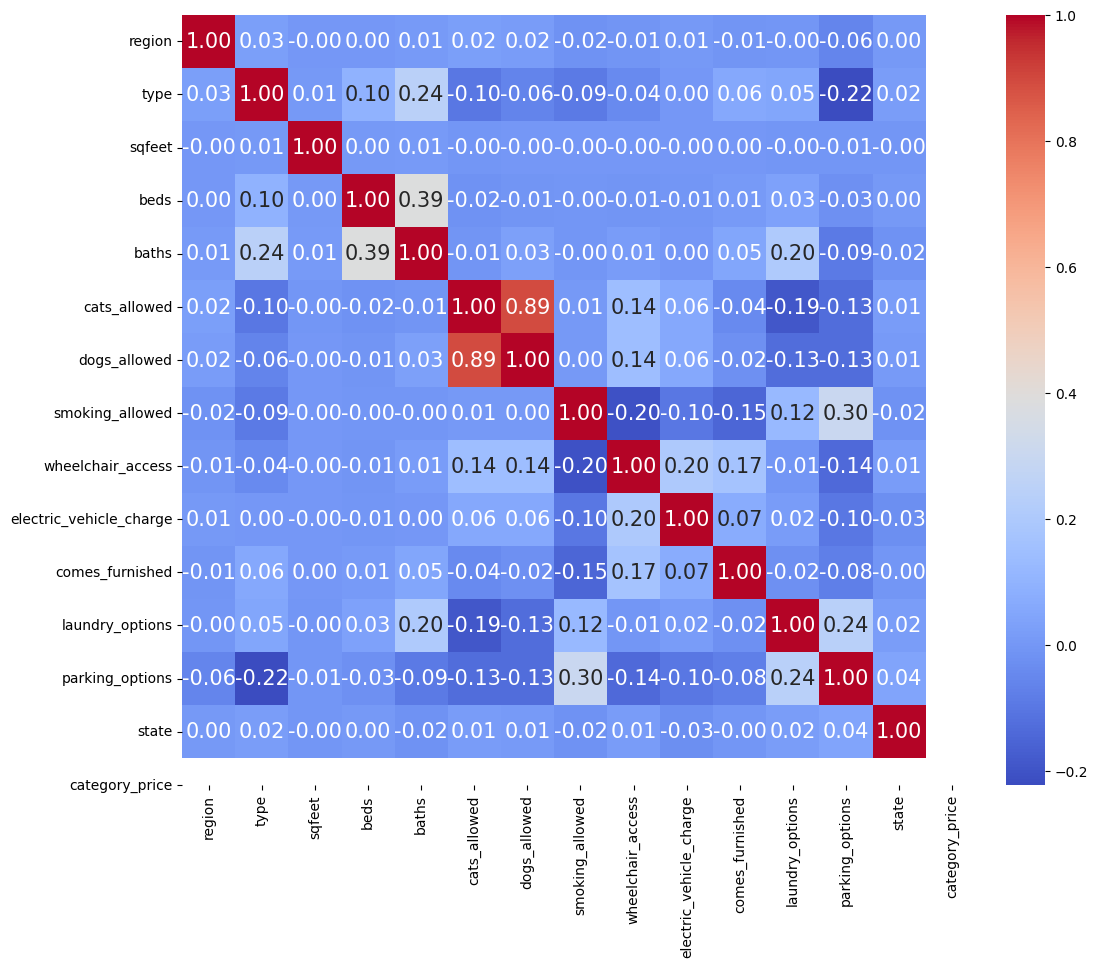

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hacemos un mapa de calor

corr = data_train.drop(columns = ['price']).corr(method='pearson')
plt.figure(figsize=(14,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_train.drop(columns = ['price']).columns, 
           yticklabels= data_train.drop(columns = ['price']).columns,
           cmap= 'coolwarm')

plt.show()



## Pairplot

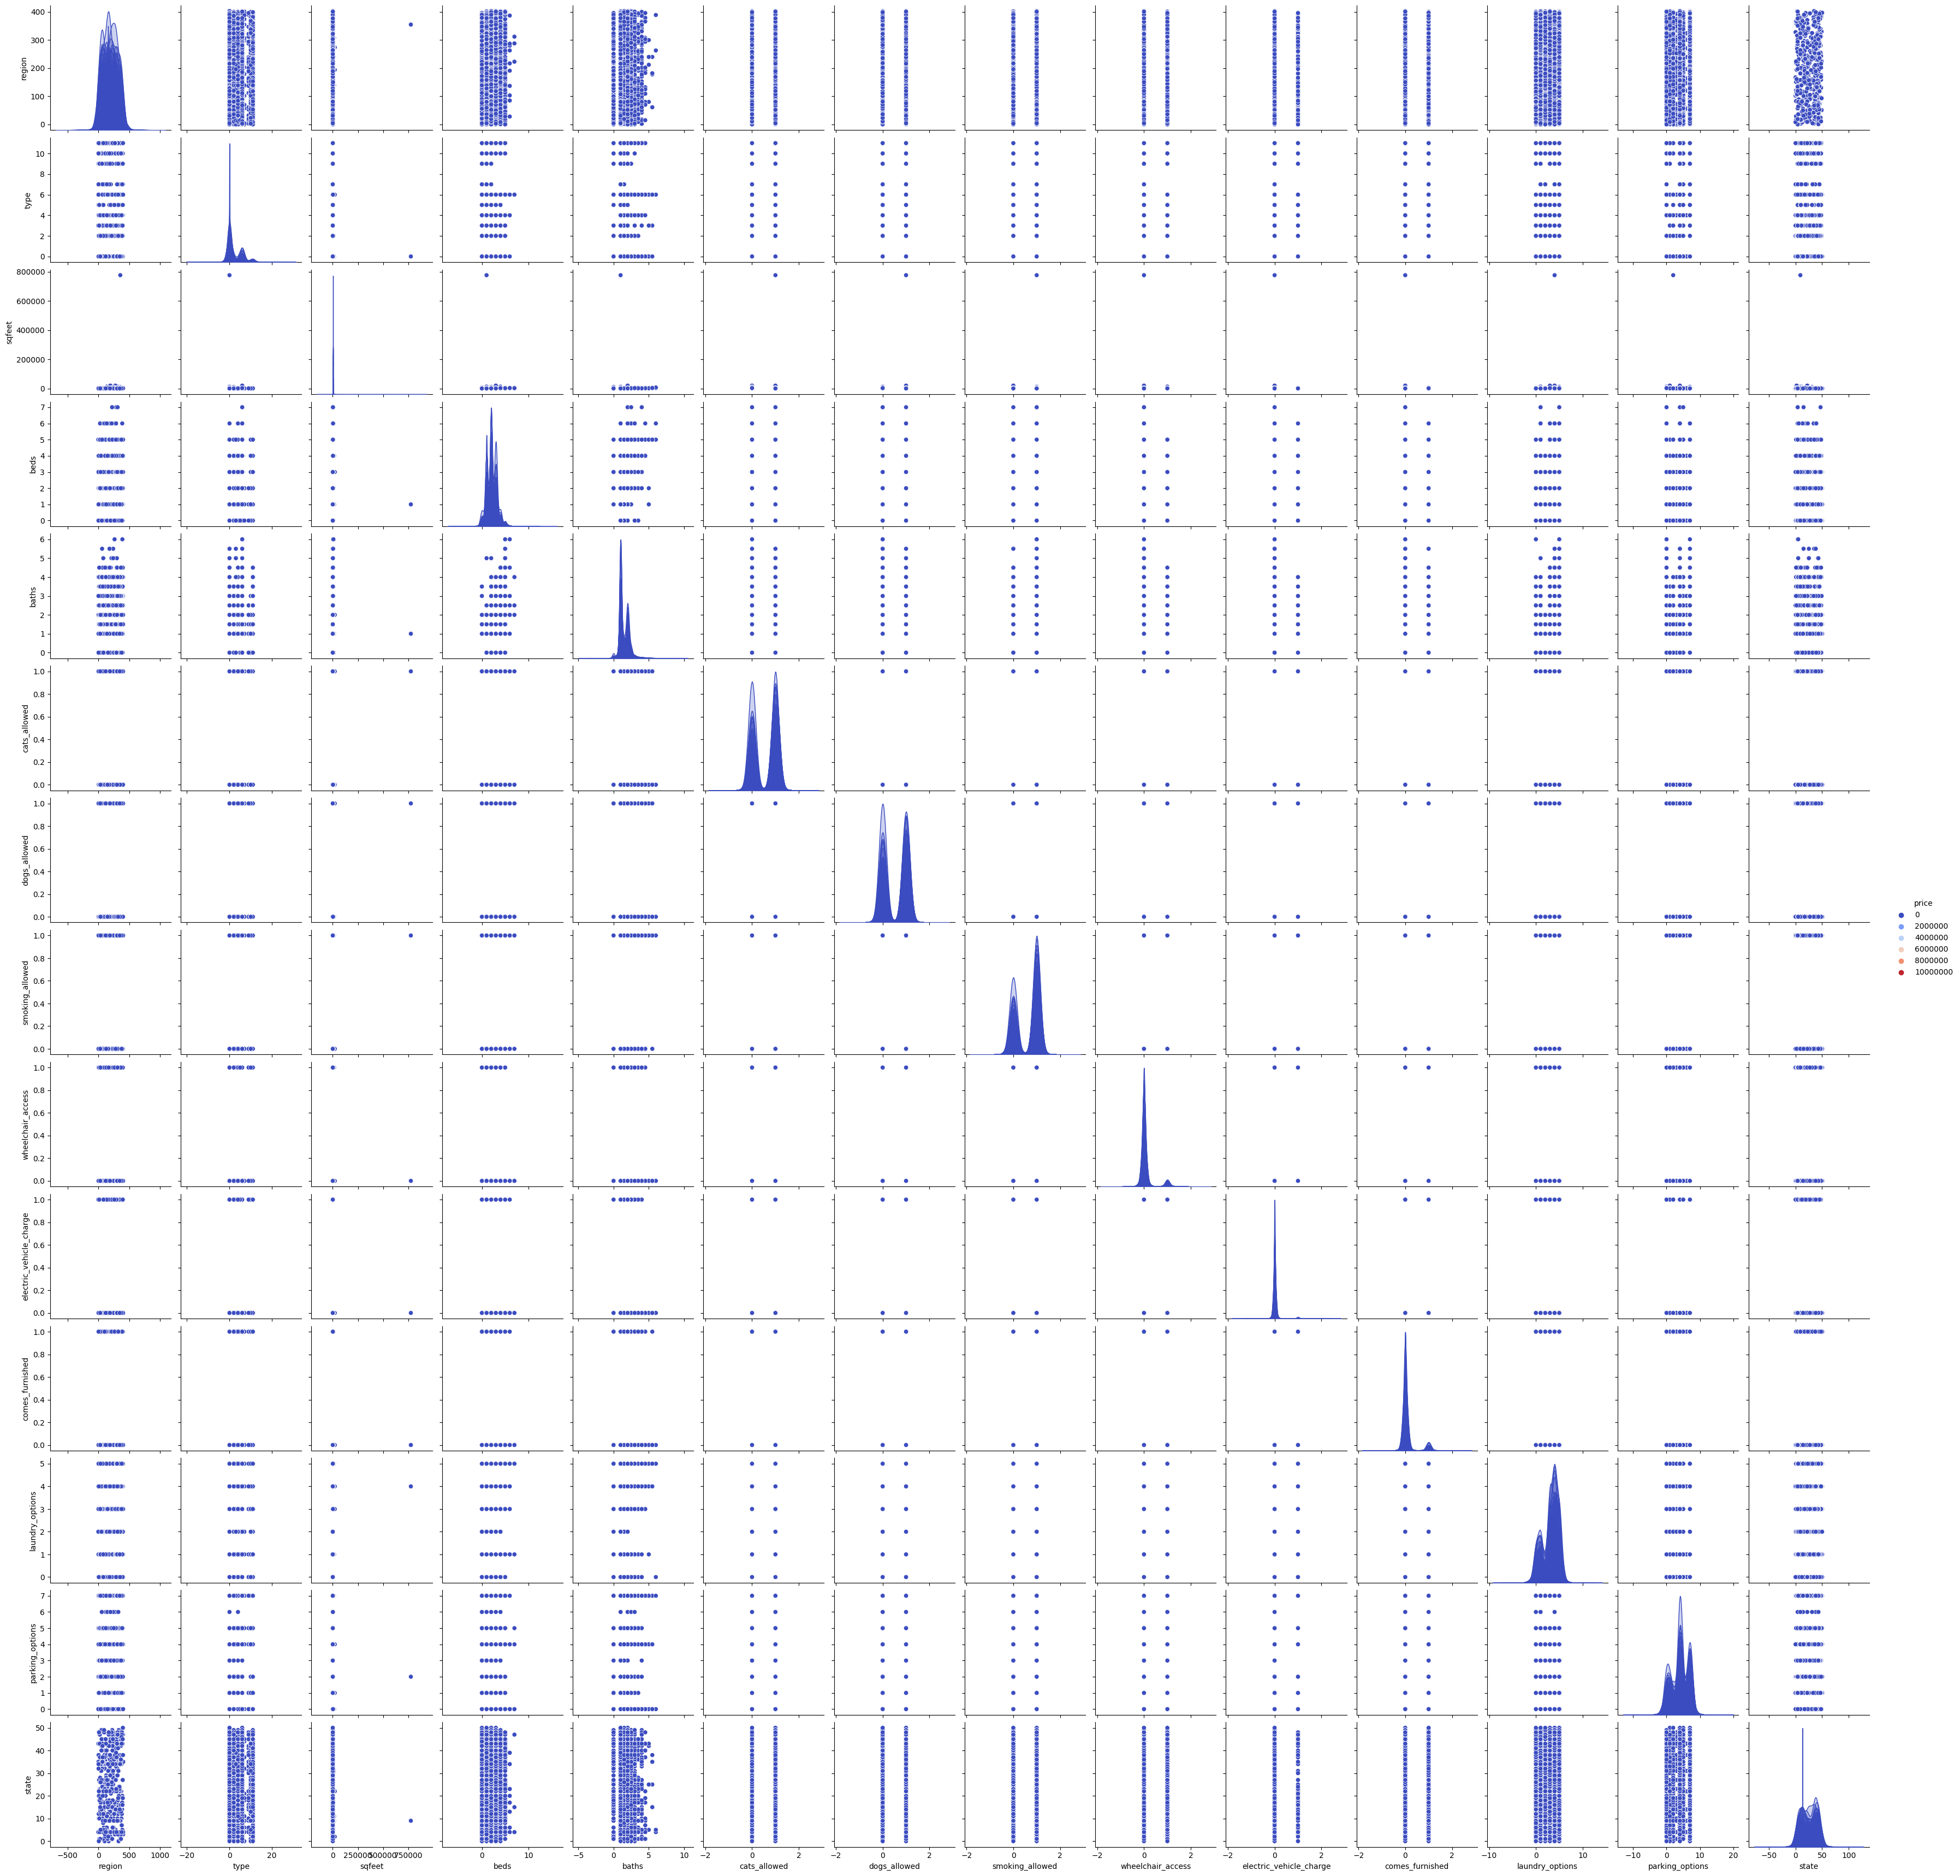

In [46]:
# Hacemos un pairplot para ver la correlación entre las variables

sns.pairplot(data_train.sample(frac = 0.1), hue = 'price', palette='coolwarm')
plt.show()

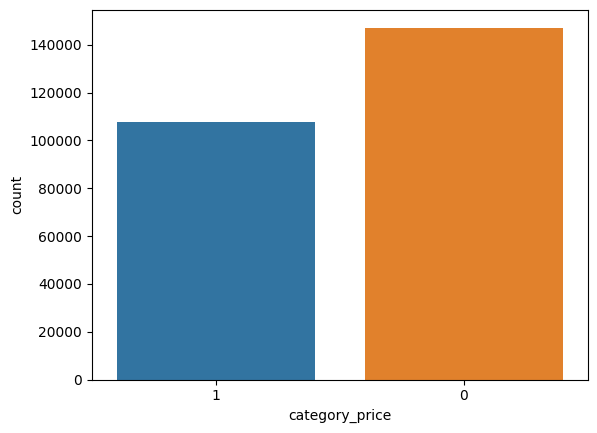

In [47]:
# Observamos cuántos casos hay de low y cuántos high

sns.countplot(x = 'category_price', data = data_train)
plt.show()

# *A modelar...*

## 3.División en conjuntos de entrenamiento y prueba

#### Esta etapa implica la división del conjunto de datos en dos subconjuntos: el conjunto de entrenamiento, que se utilizará para entrenar el modelo, y el conjunto de prueba, que se utilizará para evaluar el rendimiento del modelo.

### Definiendo 'X' e 'y'

In [82]:
# Cree la lista de características a continuación
feature_names = data_train[['region', 'type',	'sqfeet', 'beds',	'baths', 'cats_allowed', 'dogs_allowed',	'smoking_allowed',	'wheelchair_access',	'electric_vehicle_charge',	'comes_furnished',	'laundry_options',	'parking_options',	'state']]


# Seleccione los datos correspondientes a las funciones en feature_names
X = feature_names

In [83]:
y = data_train['category_price']

## Para el dataset *Test*

### Definiendo 'X' 

In [84]:
# Cree la lista de características a continuación
feature_names_test = data_test[['region', 'type',	'sqfeet', 'beds',	'baths', 'cats_allowed', 'dogs_allowed',	'smoking_allowed',	'wheelchair_access',	'electric_vehicle_charge',	'comes_furnished',	'laundry_options',	'parking_options',	'state']]


# Seleccione los datos correspondientes a las funciones en feature_names
X_final = feature_names_test

#### Dividimos el primer dataset en dos grupos 

In [73]:
from sklearn.model_selection import train_test_split


# Separamos nuestros datos en entrenamiento y test. X se denota con mayúscula ya que incluye dos atributos


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(178493, 14) (178493,) (76498, 14) (76498,)


## 4.Entrenamiento del modelo y 5.Evaluación del modelo

In [74]:
from sklearn.metrics import accuracy_score, recall_score

#### **Modelo : Árbol de Decisión**
#### Es un algoritmo utilizado para encontrar la relación entre una variable dependiente y una o más variables independientes. Se utiliza para predecir valores discretos. 

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Crear un objeto de árbol de decisión
arbol_decision = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
arbol_decision.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred_arbol = arbol_decision.predict(X_test)

y_pred_arbol


array(['0', '0', '1', ..., '0', '1', '0'], dtype=object)

In [54]:
# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred_arbol)
print("Accuracy:", accuracy)

# Calcular el recall
recall = recall_score(y_test, y_pred_arbol, average= None)
print("Recall:", recall)

Accuracy: 0.8969384820518184
Recall: [0.91432454 0.87320286]


## Para el dataset *Test*

In [55]:
# Hacer predicciones con los datos de Test
y_pred_final_arbol = arbol_decision.predict(X_final)

y_pred_final_arbol

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

In [56]:
data_test['pred'] =y_pred_final_arbol

In [57]:
ruta = 'D:/Berenice/Machine_learning_model/DanielaCoVi.csv'

data_test['pred'].to_csv(ruta, index=False, encoding='utf-8')

#### **Modelo : Random Forest** 
#### Es un algoritmo que utiliza varios árboles de decisión para mejorar la precisión del modelo. En Python, se puede utilizar la librería scikit-learn para implementar un Random Forest. dame codigo un ejemplo

In [58]:
# Importar las librerías necesarias
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

# Instanciamos el modelo

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)

# Ajustar el modelo a los datos
clf.fit(X_train,y_train)

# Realizar predicciones
# Evaluamos

y_train_pred = clf.predict(X_train)
y_test_pred_rf = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred_rf))
y_test_pred_rf

0.9871423529214031
0.9160631650500667


array(['0', '0', '1', ..., '0', '1', '0'], dtype=object)

In [59]:
# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy:", accuracy)

# Calcular el recall
recall = recall_score(y_test, y_test_pred_rf, average= None)
print("Recall:", recall)

Accuracy: 0.9160631650500667
Recall: [0.93882912 0.88498284]


## Para el dataset *Test*

In [60]:
# Hacer predicciones con los datos de Test

y_test_pred_f = clf.predict(X_final)

y_test_pred_f

array(['0', '1', '0', ..., '1', '0', '0'], dtype=object)

In [61]:
data_test['pred'] = y_test_pred_f

In [62]:
ruta = 'D:/Berenice/Machine_learning_model/DanielaCoVi.csv'

data_test['pred'].to_csv(ruta, index=False, encoding='utf-8')

#### **Modelo : K-nearest neighbors**

Es un algoritmo de aprendizaje automático de clasificación, que se basa en la idea de asignar una clase a un nuevo punto de datos basándose en las k observaciones más cercanas en el espacio de características. El algoritmo no construye un modelo para representar los datos, sino que se basa en la idea de que los puntos similares tendrán la misma clase.

In [63]:
from sklearn.neighbors import KNeighborsClassifier # Modelo 1
from sklearn.metrics import silhouette_score

# Se define el clasificador
knn = KNeighborsClassifier(3)

# Se entrena el modelo
knn.fit(X_train, y_train)

# Predicciones
y_train_pred = knn.predict(X_train)
y_test_pred_kn = knn.predict(X_test)

# Desempeño del modelo en train, calculando la precisión (accuracy)
knn_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del modelo en test, calculando la precisión (accuracy)
knn_test_accuracy = accuracy_score(y_test, y_test_pred_kn)

print('Desempeño del modelo para el Training set: ',knn_train_accuracy)
print('Desempeño del modelo para el Test set: ',knn_test_accuracy)

Desempeño del modelo para el Training set:  0.9298459883580869
Desempeño del modelo para el Test set:  0.8799968626630762


In [64]:
# Calcular el recall
recall = recall_score(y_test, y_test_pred_kn, average= None)
print("Recall:", recall)

Recall: [0.91070094 0.83807934]


## Para el dataset *Test*

In [65]:
y_test_pred_final_kn = knn.predict(X_final)

y_test_pred_final_kn

array(['0', '1', '0', ..., '0', '0', '0'], dtype=object)

In [66]:
data_test['pred'] = y_test_pred_final_kn

In [67]:
ruta = 'D:/Berenice/Machine_learning_model/DanielaCoVi.csv'

data_test['pred'].to_csv(ruta, index=False, encoding='utf-8')

## No supervisado

In [104]:
X_no_supervisado = data_train[['region', 'type', 'beds',	'baths', 'cats_allowed', 'dogs_allowed',	'electric_vehicle_charge',	'state']]

In [105]:
X_no_supervisado.corr()

,region,type,beds,baths,cats_allowed,dogs_allowed,electric_vehicle_charge,state
region,1.000000,0.025768,0.000489,0.011603,0.022139,0.015135,0.006058,0.003296
type,0.025768,1.000000,0.096251,0.242183,-0.098238,-0.062631,0.000554,0.019044
beds,0.000489,0.096251,1.000000,0.387447,-0.018651,-0.009863,-0.005973,0.004193
baths,0.011603,0.242183,0.387447,1.000000,-0.008306,0.030843,0.002217,-0.019910
cats_allowed,0.022139,-0.098238,-0.018651,-0.008306,1.000000,0.890435,0.056543,0.014006
dogs_allowed,0.015135,-0.062631,-0.009863,0.030843,0.890435,1.000000,0.056117,0.009145
electric_vehicle_charge,0.006058,0.000554,-0.005973,0.002217,0.056543,0.056117,1.000000,-0.028571
state,0.003296,0.019044,0.004193,-0.019910,0.014006,0.009145,-0.028571,1.000000


In [106]:
X_no_supervisado_2 = data_test[['region', 'type', 'beds',	'baths', 'cats_allowed', 'dogs_allowed',	'electric_vehicle_charge',	'state']]

In [107]:
X_no_supervisado_2.corr()

,region,type,beds,baths,cats_allowed,dogs_allowed,electric_vehicle_charge,state
region,1.000000,0.022210,-0.006350,0.005480,0.030108,0.019724,0.011639,-0.012599
type,0.022210,1.000000,0.056637,0.205053,-0.099505,-0.064111,0.003355,0.011704
beds,-0.006350,0.056637,1.000000,0.613230,-0.020588,-0.014766,-0.002996,-0.003610
baths,0.005480,0.205053,0.613230,1.000000,-0.022616,0.007578,0.004583,-0.024067
cats_allowed,0.030108,-0.099505,-0.020588,-0.022616,1.000000,0.886800,0.050117,0.030380
dogs_allowed,0.019724,-0.064111,-0.014766,0.007578,0.886800,1.000000,0.050109,0.018677
electric_vehicle_charge,0.011639,0.003355,-0.002996,0.004583,0.050117,0.050109,1.000000,-0.029476
state,-0.012599,0.011704,-0.003610,-0.024067,0.030380,0.018677,-0.029476,1.000000


#### **Modelo : KMeans**

KMeans es un algoritmo de clustering, es decir, se utiliza para agrupar los datos en diferentes clusters o grupos de forma automática. El algoritmo funciona dividiendo los datos en k clusters (donde k es un parámetro proporcionado por el usuario) de tal forma que los puntos en cada cluster son similares entre sí. El algoritmo se basa en la idea de minimizar la varianza dentro de cada cluster.

In [108]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Crear objeto de clustering (ejemplo utilizando KMeans)
clusterer = KMeans(n_clusters=2, random_state=52)

# Ajustar modelo a datos
clusterer.fit(X_no_supervisado)

# Predicciones en el conjunto de entrenamiento
y_train_pred = clusterer.predict(X_no_supervisado)

y_train_pred


array([0, 0, 1, ..., 1, 1, 0])

In [112]:
# Calcular el Silhouette Score para el conjunto de prueba

score = silhouette_score(X_no_supervisado, y_train_pred)
print("Silhouette Score (conjunto de prueba):", score)


Silhouette Score (conjunto de prueba): 0.6131836816022325


## Para el dataset *Test*

In [109]:
# Predicciones en el conjunto de test
y_test_pred_km = clusterer.predict(X_no_supervisado_2)

y_test_pred_km

array([0, 1, 0, ..., 1, 1, 0])

In [110]:
data_test['pred'] = y_test_pred_km

In [111]:
ruta = 'D:/Berenice/Machine_learning_model/DanielaCoVi.csv'

data_test['pred'].to_csv(ruta, index=False, encoding='utf-8')